In [231]:
from PIL import Image as ImagePil
import numpy as np
im = ImagePil.open('bean.jpg')
indexed_orig = np.array(im)
print(im.size,
    im.mode)
print(ImagePil.__version__)

(1280, 720) RGB
5.4.1


In [232]:
print(indexed_orig)

[[[159 118 114]
  [187 144 138]
  [175 132 126]
  ...
  [124 109  78]
  [129 114  83]
  [113  98  67]]

 [[157 116 112]
  [185 142 136]
  [172 129 123]
  ...
  [122 107  78]
  [125 110  79]
  [105  90  59]]

 [[155 114 108]
  [179 138 132]
  [168 125 119]
  ...
  [121 106  77]
  [123 108  79]
  [100  85  56]]

 ...

 [[159 143 143]
  [205 187 187]
  [195 177 177]
  ...
  [182 169 153]
  [186 173 157]
  [156 143 127]]

 [[161 143 143]
  [205 187 187]
  [195 177 177]
  ...
  [178 165 149]
  [182 169 153]
  [152 139 123]]

 [[161 143 143]
  [205 187 187]
  [195 177 177]
  ...
  [175 162 146]
  [180 167 151]
  [150 137 121]]]


In [156]:
im = im.convert('P', palette=ImagePil.ADAPTIVE, colors=256) #will return None if more than 256 colours
print(im.getcolors())
im2 = im.convert('RGB')
# im = im2.convert('P')
print(im2.getcolors())

[(3907, 0), (5582, 1), (5221, 2), (3294, 3), (4187, 4), (5887, 5), (3164, 6), (2728, 7), (3108, 8), (1113, 9), (6753, 10), (1411, 11), (3265, 12), (3151, 13), (3377, 14), (3242, 15), (4331, 16), (3865, 17), (2852, 18), (3416, 19), (3582, 20), (3065, 21), (2926, 22), (4265, 23), (3312, 24), (5080, 25), (4824, 26), (3320, 27), (4747, 28), (3958, 29), (652, 30), (4781, 31), (2830, 32), (6010, 33), (1978, 34), (4468, 35), (4255, 36), (2213, 37), (3344, 38), (3951, 39), (4014, 40), (5041, 41), (3280, 42), (3648, 43), (8132, 44), (7185, 45), (2384, 46), (5404, 47), (3496, 48), (4612, 49), (1527, 50), (4459, 51), (5664, 52), (1487, 53), (1299, 54), (6005, 55), (2743, 56), (5811, 57), (4365, 58), (3555, 59), (2814, 60), (3862, 61), (6018, 62), (4948, 63), (5527, 64), (3137, 65), (3002, 66), (2327, 67), (3497, 68), (3290, 69), (4939, 70), (4421, 71), (2718, 72), (2454, 73), (2529, 74), (4656, 75), (3673, 76), (6763, 77), (1832, 78), (4926, 79), (1193, 80), (4119, 81), (4428, 82), (3251, 83), (3

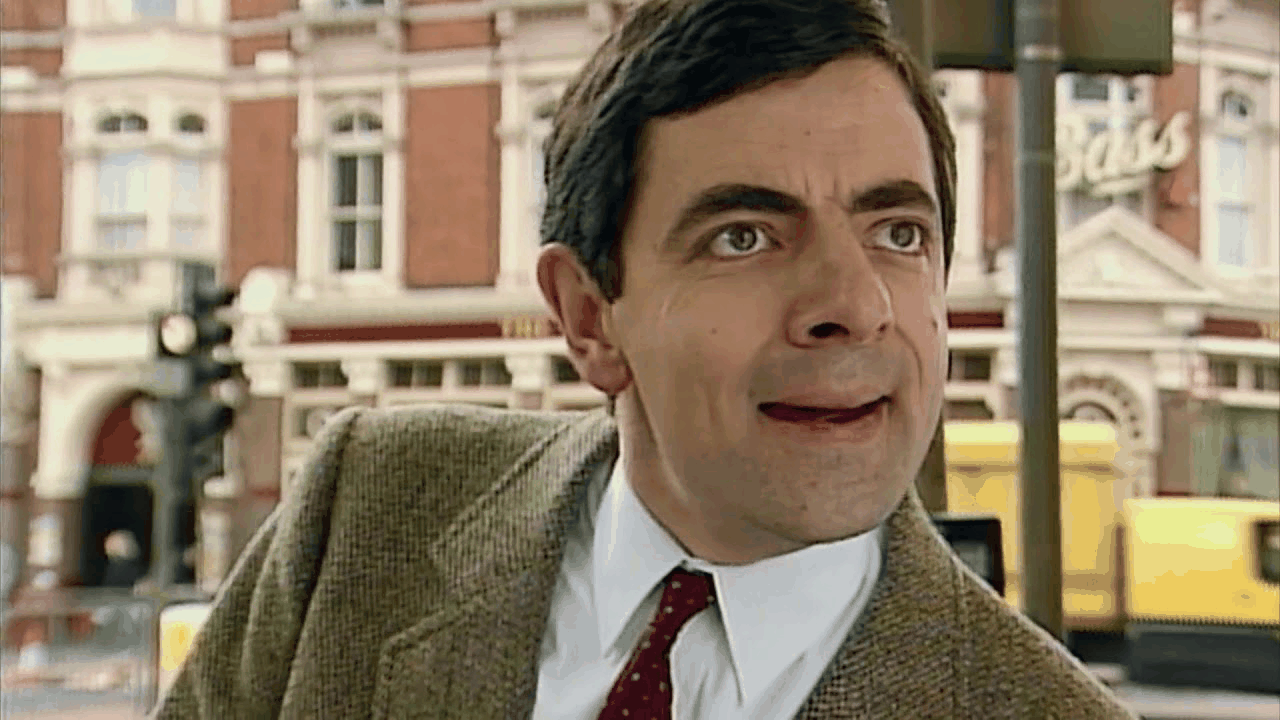

In [157]:
im

In [158]:
indexed = np.array(im)
indexed

array([[119,  79,  87, ..., 156, 154, 174],
       [119,  84,  88, ..., 156, 154, 181],
       [119,  84,  88, ..., 156, 154, 186],
       ...,
       [106,  42,  56, ...,  68,  68, 107],
       [106,  42,  56, ...,  72,  68, 112],
       [106,  42,  56, ...,  74,  72, 112]], dtype=uint8)

In [159]:
# Get the colour palette
palette = im.getpalette()
print(len(palette)) #(3*256)
# Determine the total number of colours
num_colours = int(len(palette)/3)
print(num_colours)
# Determine maximum value of the image data type
max_val = float(np.iinfo(indexed.dtype).max)
print(max_val)
# Create a colour map matrix
map = np.array(palette).reshape(num_colours, 3)# / max_val #Normalized to max value

768
256
255.0


In [160]:
print(im.getcolors())

[(3907, 0), (5582, 1), (5221, 2), (3294, 3), (4187, 4), (5887, 5), (3164, 6), (2728, 7), (3108, 8), (1113, 9), (6753, 10), (1411, 11), (3265, 12), (3151, 13), (3377, 14), (3242, 15), (4331, 16), (3865, 17), (2852, 18), (3416, 19), (3582, 20), (3065, 21), (2926, 22), (4265, 23), (3312, 24), (5080, 25), (4824, 26), (3320, 27), (4747, 28), (3958, 29), (652, 30), (4781, 31), (2830, 32), (6010, 33), (1978, 34), (4468, 35), (4255, 36), (2213, 37), (3344, 38), (3951, 39), (4014, 40), (5041, 41), (3280, 42), (3648, 43), (8132, 44), (7185, 45), (2384, 46), (5404, 47), (3496, 48), (4612, 49), (1527, 50), (4459, 51), (5664, 52), (1487, 53), (1299, 54), (6005, 55), (2743, 56), (5811, 57), (4365, 58), (3555, 59), (2814, 60), (3862, 61), (6018, 62), (4948, 63), (5527, 64), (3137, 65), (3002, 66), (2327, 67), (3497, 68), (3290, 69), (4939, 70), (4421, 71), (2718, 72), (2454, 73), (2529, 74), (4656, 75), (3673, 76), (6763, 77), (1832, 78), (4926, 79), (1193, 80), (4119, 81), (4428, 82), (3251, 83), (3

In [161]:
map[50:60,:]

array([[205, 180, 139],
       [194, 197, 200],
       [190, 195, 198],
       [192, 195, 189],
       [193, 190, 185],
       [185, 190, 192],
       [187, 183, 183],
       [175, 180, 181],
       [194, 188, 165],
       [193, 181, 164]])

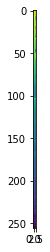

In [162]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(map)

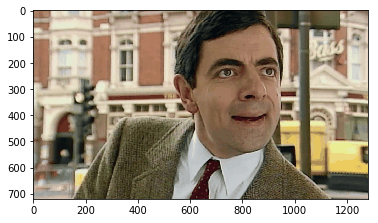

In [163]:
plt.imshow(map[indexed])

In [168]:
import scipy.misc
scipy.misc.imsave('indexed.jpg', indexed)
scipy.misc.imsave('map_indexed.jpg', map[indexed])

C:\Users\ZEISS\Miniconda3\envs\ColorIndex\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  
C:\Users\ZEISS\Miniconda3\envs\ColorIndex\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [169]:
indexed.shape

(720, 1280)

In [177]:
import os
from skimage.io import imread
from skimage.transform import resize

In [175]:
image_dir = r'C:\Users\ZEISS\Desktop\KiTech\RGBStack'
list_of_images = [name for name in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, name))]
print(list_of_images[0])

RGB0000.jpg


In [233]:
index = 0
img_height, img_width, channels = imread(os.path.join(image_dir, list_of_images[0])).shape
Images = np.zeros((len(list_of_images),img_height, img_width, channels), dtype = np.uint8)
converted_img = []
for _,file in enumerate(list_of_images):
        img = ImagePil.open(os.path.join(image_dir, file))
        #In case you want to resize images use the line blow
        #img = resize(img, (img_height,img_width,channels), mode='reflect', anti_aliasing=True)
        #converted_img.append(img.convert('P', palette=ImagePil.ADAPTIVE, colors=256))
        Images[index] = np.array(img)
        index+=1

In [369]:
len(Images)

86

In [236]:
print(converted_img[0].size)
Images.shape

(144, 144)


(86, 144, 144, 3)

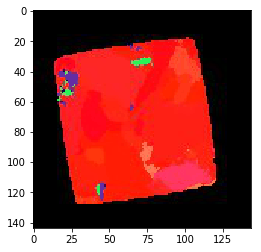

In [222]:
plt.imshow(converted_img[0])
plt.show()

In [266]:
flat_images = Images.reshape((-1,3))

In [362]:
flat_images.shape

(1783296, 3)

In [290]:
flat_images[0]

array([0, 0, 0], dtype=uint8)

In [425]:
unique_colours = np.unique(flat_images,axis=0)

In [426]:
unique_colours[0:10]

array([[ 0,  0,  0],
       [ 0,  0,  2],
       [ 0,  0,  4],
       [ 0,  0,  5],
       [ 0,  0,  7],
       [ 0,  0,  8],
       [ 0,  0,  9],
       [ 0,  0, 10],
       [ 0,  0, 11],
       [ 0,  0, 12]], dtype=uint8)

In [427]:
unique_colours.shape

(59273, 3)

In [293]:
flat_orig = indexed_orig.reshape((-1,3))
flat_orig.shape

(921600, 3)

In [295]:
unique_colours_orig = np.unique(indexed_orig.reshape((-1,3)), axis=0)

In [297]:
unique_colours_orig.shape

(114453, 3)

In [356]:
img_list = np.array([[2,2,3],[255,243,198],[2,2,3]])
colours = np.unique(img_list, axis=0)

In [366]:
colours.dtype
#img_list[0]

dtype('int32')

In [315]:
if sum(img_list[1] == colours[1]) == 3:
    print('yes')
else:
    print('n')

yes


In [324]:
T = np.zeros((len(img_list)), dtype = np.uint32)
for i in range(len(img_list)):
    for j in range(len(colours)):
        if sum(img_list[i] == colours[j]) == 3:
            T[i] = j
    

In [325]:
T

array([0, 1, 0], dtype=uint32)

In [326]:
import timeit

In [327]:
#Function that creates a greyscale image of lookup values for all unique colours in image stack
def indexing_func(key_list, value_list):
    key_map = {tuple(key): i for i, key in enumerate(key_list)}
    result = np.array([key_map[tuple(value)] for value in value_list])
    return result

In [328]:
indexing_func(colours, img_list)

array([0, 1, 0])

In [331]:
def wrapper(func, *args, **kwargs):
    def wrapped():
        return func(*args, **kwargs)
    return wrapped

In [428]:
wrapped = wrapper(indexing_func, unique_colours, flat_images)

In [429]:
timeit.timeit(wrapped, number = 1)

3.8095278599648736

In [368]:
T = indexing_func(unique_colours, flat_images)

In [372]:
T = T.reshape((len(Images), img_height, img_width))
T.shape

(86, 144, 144)

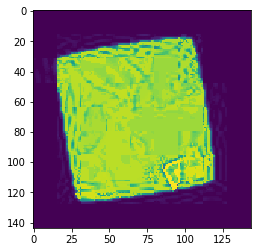

In [373]:
plt.imshow(T[50])
plt.show()

In [375]:
T[0][40][115:125]

array([ 283,  136, 1250,  103,    2, 1607, 1894, 2039, 1893, 1461])

In [409]:
np.sqrt((len(unique_colours)-105)/2)

172.0

Show colour LUT for every second value. Rounded to make a square figure

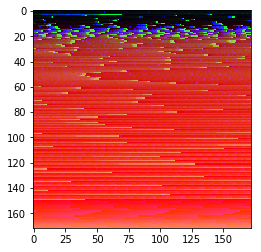

In [411]:
plt.imshow(unique_colours[:-105:2].reshape((int(np.sqrt(len((unique_colours)-105)/2)),int(np.sqrt(len((unique_colours)-105)/2)),-1)))
plt.show()

Plot indexed colour image (stack 'T') using created colour map 'unique_colours'

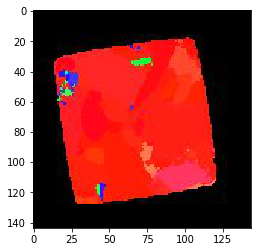

In [414]:
plt.imshow(unique_colours[T[0]])
plt.show()

In [339]:
def indexing_func_alt(key_list, value_list):
    result = np.where((key_list[None] == value_list[:, None]).all(axis=-1))[1]
    return result

In [361]:
result = np.where((colours[None] == img_list[:, None]).all(axis=-1))[1]

In [430]:
wrapped = wrapper(indexing_func_alt, unique_colours, flat_images)

In [431]:
timeit.timeit(wrapped, number = 1)

C:\Users\ZEISS\Miniconda3\envs\ColorIndex\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  


AttributeError: 'bool' object has no attribute 'all'

In [352]:
def indexing_func_2ndalt(key_list, value_list):
    # View them as 1-d structured arrays of 3-tuples
    v_value_list = value_list.view(dtype='i,i,i').reshape(value_list.shape[0])
    v_key_list   = key_list.view(dtype='i,i,i').reshape(key_list.shape[0])

    result = np.argmax(v_key_list[:,None] == v_value_list[None,:], axis=0)
    return result

In [359]:
wrapped = wrapper(indexing_func_2ndalt, unique_colours, flat_images)

In [360]:
timeit.timeit(wrapped, number = 1)

ValueError: When changing to a larger dtype, its size must be a divisor of the total size in bytes of the last axis of the array.

In [367]:
np.__version__

'1.15.4'

In [415]:
name = 'RGB0000.jpg'
imgA = ImagePil.open(os.path.join(image_dir, name))
indexed_img = np.array(imgA)
flattened_img = indexed_img.reshape((-1,3))
colours = np.unique(flattened_img, axis=0)

In [421]:
wrapped = wrapper(indexing_func_alt, colours, flattened_img)

In [422]:
timeit.timeit(wrapped, number = 1)

4.175959883024916

In [423]:
wrapped = wrapper(indexing_func, colours, flattened_img)

In [424]:
timeit.timeit(wrapped, number = 1)

0.053102609992492944

In [432]:
unique_colours.dtype

dtype('uint8')

In [433]:
flat_images.dtype

dtype('uint8')

-------------------------------------------------------------------------------------------------

In [227]:
from PIL import Image as ImagePil
from PIL import ImageFilter as ImagePilFilter
import numpy as np
import os
import imageio
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt

%matplotlib inline

print(ImagePil.__version__)

5.4.1


In [8]:
image_dir = r'C:\Users\ZEISS\Desktop\PythonProcessing\ColourIndexing\RGBStack'
list_of_images = [name for name in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, name))]
print(list_of_images[0])

RGB0000.jpg


In [229]:
index = 0
img_height, img_width, channels = imageio.imread(os.path.join(image_dir, list_of_images[0])).shape
Images = np.zeros((len(list_of_images),img_height, img_width, channels), dtype = np.uint8)

for _,file in enumerate(list_of_images):
        img = ImagePil.open(os.path.join(image_dir, file))
        ##
        img = img.filter(ImagePilFilter.MedianFilter(size=3))
        img = img.convert('P', palette=ImagePil.ADAPTIVE, colors=256) #will return None if more than 256 colours
        img = img.convert('RGB')
        ##
        Images[index] = np.array(img)
        index+=1

In [ ]:
index = 0
img_height, img_width, channels = imageio.imread(os.path.join(image_dir, list_of_images[0])).shape
Images = np.zeros((len(list_of_images),img_height, img_width, channels), dtype = np.uint8)

for _,file in enumerate(list_of_images):
        img = ImagePil.open(os.path.join(image_dir, file))
        data = np.array(img) / 255.0
        data = data.reshape((-1,3))
        kmeans = MiniBatchKMeans(64, batch_size=256)
        kmeans.fit(data)
        new_colour_img = kmeans.cluster_centers_[kmeans.predict(data)]
        Images[index] = new_colour_img.reshape(img_height, img_width,3)
        index+=1

In [230]:
flattened_imgs = Images.reshape((-1,3))

In [199]:
data = flattened_imgs / 255.0
kmeans = MiniBatchKMeans(256, batch_size=2560)
kmeans.fit(data)
new_colour_imgs = kmeans.cluster_centers_[kmeans.predict(data)]

In [200]:
new_colour_imgs.shape

(1783296, 3)

In [231]:
flattened_imgs = Images.reshape((-1,3))
colours = np.unique(flattened_imgs, axis=0)

In [264]:
len(colours)

6944

In [201]:
new_colours = np.unique(new_colour_imgs, axis=0)
len(new_colours)

201

In [77]:
new_colours[10]

array([0.03965142, 0.00392157, 0.00043573])

In [202]:
new_colours = np.round_(new_colours*255).astype(np.uint8)
new_colour_imgs = np.round_(new_colour_imgs*255).astype(np.uint8)

In [203]:
new_colour_imgs[10000]

array([255,  28,   1], dtype=uint8)

In [21]:
#Function that creates a greyscale image of lookup values for all unique colours in image stack
def indexing_func(key_list, value_list):
    key_map = {tuple(key): i for i, key in enumerate(key_list)}
    result = np.array([key_map[tuple(value)] for value in value_list])
    return result

In [11]:
def wrapper(func, *args, **kwargs):
    def wrapped():
        return func(*args, **kwargs)
    return wrapped

In [13]:
wrapped = wrapper(indexing_func, colours, flattened_imgs)

In [15]:
import timeit
timeit.timeit(wrapped, number = 1)

3.56084282300003

In [233]:
indexed_imgs = indexing_func(colours, flattened_imgs)

In [234]:
indexed_imgs = indexed_imgs.reshape((len(Images), img_height, img_width))
indexed_imgs.shape

(86, 144, 144)

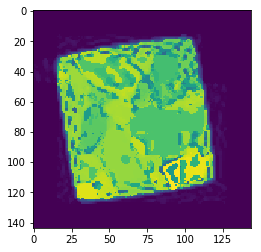

In [235]:
plt.imshow(indexed_imgs[50])
plt.show()

In [262]:
np.sqrt(len((colours))-55)

83.0

In [265]:
factor = 55
step = 1

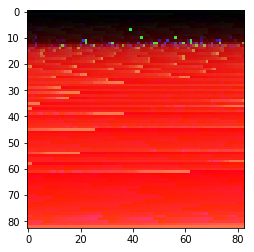

In [266]:
plt.imshow(colours[:-factor:step].reshape((int(np.sqrt(len((colours)-factor)/step)),int(np.sqrt(len((colours)-factor)/step)),-1)))
plt.show()

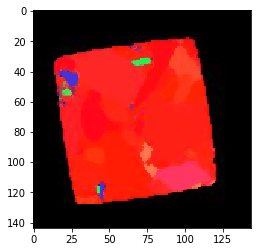

In [267]:
plt.imshow(colours[indexed_imgs[0]])
plt.show()

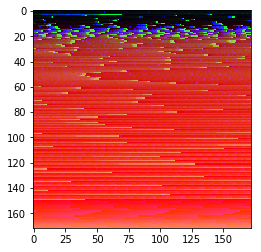

In [21]:
plt.imshow(colours[:-105:2].reshape((int(np.sqrt(len((colours)-105)/2)),int(np.sqrt(len((colours)-105)/2)),-1)))
plt.show()

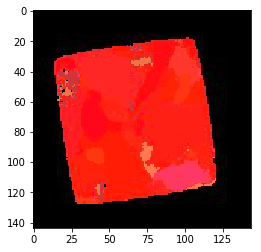

In [210]:
plt.imshow(colours[indexed_imgs[0]])
plt.show()

In [ ]:
np.sqrt(len((new_colours))-5)

In [211]:
factor  = 5

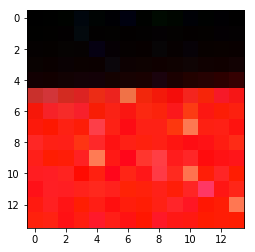

In [212]:
plt.imshow(new_colours[:-factor].reshape((int(np.sqrt(len((new_colours))-factor)),int(np.sqrt(len((new_colours))-factor)),-1)))
plt.show()

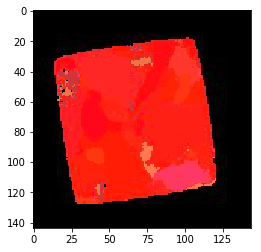

In [213]:
plt.imshow(new_colours[indexed_imgs[0]])
plt.show()

In [70]:
new_colours[10]

array([5355.,    0.,    0.])

In [63]:
len(indexed_imgs)
indexed_imgs.dtype

dtype('int32')

In [268]:
#To Do Save indexed image stack as tiff stack - check
#To Do Format for Dragonfly LUT for colors - reduce colours to lower number. Difficulty when high number of one colour
save_dir = r'C:\Users\ZEISS\Desktop\PythonProcessing\ColourIndexing\Indexed'
for i in range(len(indexed_imgs)):
    imageio.imwrite(os.path.join(save_dir,'indexed'+str(i)+'.tif'), indexed_imgs[i,:,:].astype(np.uint16))

In [269]:
save_dir = r'C:\Users\ZEISS\Desktop\PythonProcessing\ColourIndexing'
np.save(os.path.join(save_dir,'colours.npy'), colours)